In [9]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

display(HTML('<script> $(document).ready(function() { $(\"div.input\").hide(); }); </script>'))

## Creating a PI-controller using Operational Amplifiers

In analog electronics, operational amplifiers are generally used for the realization of Proportional-Integral-Derivating (PID) controllers. While the mathematical model for Linear Time-Invariant (LTI) systems assumes ideal conditions, the realistic circuits may not entirely match them.

In most cases, the ideal model returns acceptable results, but the frequency characteristics can be approximated better by expanding the model with the amplifier's open-loop gain:
<br><br>
$$G_{ideal}(s)=\frac{V_{out}}{V_{in}}=-\frac{Z_F}{Z_G}\qquad\qquad G_{approx}(s)=\frac{V_{out}}{V_{in}}=-\frac{\frac{-A\cdot Z_F}{Z_G+Z_F}}{1+\frac{A\cdot Z_G}{Z_G+Z_F}}$$
<br>

In this example, we'll explore some of the operational amplifier based PI controller configurations.<br>
<b>First, select an open-loop gain value for the calculations!</b>

In [10]:
# Model selector
opampGain = w.ToggleButtons(
    options=[('10 000', 10000), ('50 000', 50000), ('200 000', 200000),],
    description='Operational amplifier gain: ', style={'description_width':'30%'})

display(opampGain)

ToggleButtons(description='Operational amplifier gain: ', options=(('10 000', 10000), ('50 000', 50000), ('200…

The PI controller can be implemented using a resistor in the feedforward and a capacitor in the feedback path. The ideal model matches exactly the mathematical form of the controller. But after the inclusion of the open-loop gain, the integrator is replaced by a first-order system with a huge time constant, limiting the magnitude at low frequencies.
<br><br>
<img src="Images/int1.png" width="30%" />
<br>
<b>Adjust the passive components so that the non-ideal model is the closest to the ideal! Where do the characteristics significantly deviate from the ideal? What can be said about the phase plot?</b>

<IPython.core.display.Javascript object>


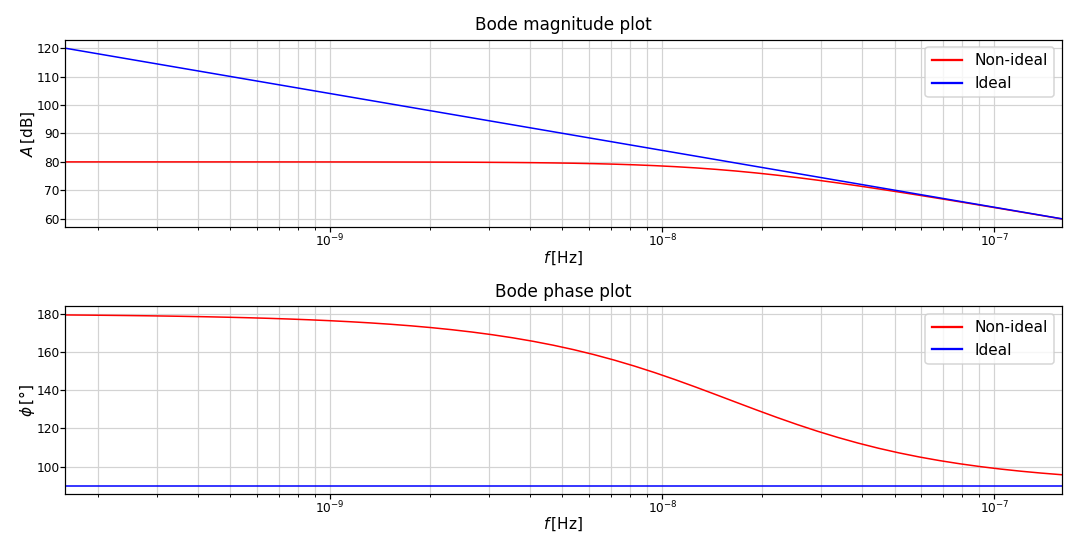

Output()

In [11]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1)
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

l1 = f1_ax1.plot([], [], color='red')
l2 = f1_ax2.plot([], [], color='red') 
l3 = f1_ax1.plot([], [], color='blue')
l4 = f1_ax2.plot([], [], color='blue')  

f1_line1 = l1[0]
f1_line2 = l2[0]
f1_line3 = l3[0]
f1_line4 = l4[0]
    
f1_ax1.legend(l1+l3, ['Non-ideal', 'Ideal'], loc=1)
f1_ax2.legend(l2+l4, ['Non-ideal', 'Ideal'], loc=1)

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='x', tight=True)
f1_ax2.autoscale(enable=True, axis='x', tight=True)
f1_ax1.autoscale(enable=True, axis='y', tight=False)
f1_ax2.autoscale(enable=True, axis='y', tight=False)

f1_ax1.set_title('Bode magnitude plot', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Bode phase plot', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8) 

# System model

def system_model(rg, cf, a):

    Rg = rg / 1000   # Convert to Ohm
    Cf = cf * 1000000   # Convert to Farad

    W_ideal = c.tf([-1], [Rg*Cf, 0])
    W_ac = c.tf([-a], [Cf*Rg*(1+a), 1])
    
    global f1_line1, f1_line2, f1_line3, f1_line4
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    f1_ax1.lines.remove(f1_line3)
    f1_ax2.lines.remove(f1_line4)

    mag, phase, omega = c.bode_plot(W_ac, Plot=False)   # Non-ideal Bode-plot
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='red')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='red') 
    
    mag, phase, omega = c.bode_plot(W_ideal, omega=omega, Plot=False)   # Ideal Bode-plot at the non-ideal points
    f1_line3, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line4, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   

    f1_ax1.relim()
    f1_ax2.relim()
    
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
    print('Ideal PI transfer function:')
    print(W_ideal)
    print('\nNon-ideal PI transfer function:')
    print(W_ac)
    
# GUI widgets
    
rg_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_g\ [k\Omega]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
cf_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$C_f\ [\mu H]\ :$', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})

input_data = w.interactive_output(system_model, {'rg':rg_slider, 'cf':cf_slider, 'a':opampGain})

display(w.HBox([rg_slider, cf_slider]), input_data)

This PI controller might be simple, but it is not possible to control the DC gain through the passive components. That's why usually, a parallel resistor is inserted into the feedback path.
<br><br>
<img src="Images/int2.png" width="30%" />
<br>
<b>Adjust the passive components so that the non-ideal model is the closest to the ideal! What are the differences compared to the previous model?</b>

<IPython.core.display.Javascript object>


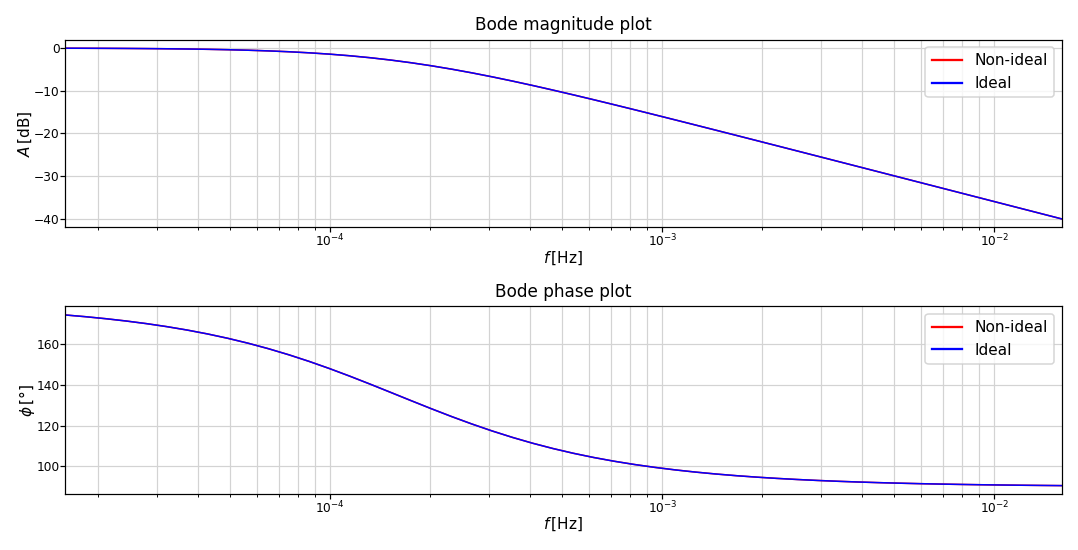

Output()

In [12]:
# Filtered PI - parallel

fig2, ((f2_ax1), (f2_ax2)) = plt.subplots(2, 1)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

l1 = f2_ax1.plot([], [], color='red')
l2 = f2_ax2.plot([], [], color='red') 
l3 = f2_ax1.plot([], [], color='blue')
l4 = f2_ax2.plot([], [], color='blue')  

f2_line1 = l1[0]
f2_line2 = l2[0]
f2_line3 = l3[0]
f2_line4 = l4[0]

f2_ax1.legend(l1+l3, ['Non-ideal', 'Ideal'], loc=1)
f2_ax2.legend(l2+l4, ['Non-ideal', 'Ideal'], loc=1)

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='x', tight=True)
f2_ax2.autoscale(enable=True, axis='x', tight=True)
f2_ax1.autoscale(enable=True, axis='y', tight=False)
f2_ax2.autoscale(enable=True, axis='y', tight=False)

f2_ax1.set_title('Bode magnitude plot', fontsize=11)
f2_ax1.set_xscale('log')
f2_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f2_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f2_ax2.set_title('Bode phase plot', fontsize=11)
f2_ax2.set_xscale('log')
f2_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f2_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

# System model

def system2_model(rg, rf, cf, a):

    Rg = rg / 1000   # Convert to Ohm
    Rf = rf / 1000
    Cf = cf * 1000000   # Convert to Farad

    W_ideal = c.tf([-1], [Rg*Cf, Rg/Rf])
    W_ac = c.tf([-a], [Cf*Rg*(a+1), Rg*(a+1)/Rf+1])
    
    global f2_line1, f2_line2, f2_line3, f2_line4
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax1.lines.remove(f2_line3)
    f2_ax2.lines.remove(f2_line4)

    mag, phase, omega = c.bode_plot(W_ac, Plot=False)   # Non-ideal Bode-plot
    f2_line1, = f2_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='red')
    f2_line2, = f2_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='red') 
    
    mag, phase, omega = c.bode_plot(W_ideal, omega=omega, Plot=False)   # Ideal Bode-plot at the non-ideal points
    f2_line3, = f2_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line4, = f2_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   

    f2_ax1.relim()
    f2_ax2.relim()

    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    
    print('Ideal filtered PI transfer function:')
    print(W_ideal)
    print('\nNon-ideal filtered PI transfer function:')
    print(W_ac)
    
# GUI widgets
    
rg2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_g$ [k$\Omega$]', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
rf2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$R_f$ [k$\Omega$]', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})
cf2_slider = w.FloatLogSlider(value=1, base=10, min=-3, max=3, description=r'$C_f$ [$\mu$H]', continuous_update=False,
                             layout=w.Layout(width='75%'), style={'description_width':'30%'})

input_data = w.interactive_output(system2_model, {'rg':rg2_slider, 'rf':rf2_slider, 'cf':cf2_slider, 'a':opampGain})

display(w.HBox([rg2_slider, rf2_slider, cf2_slider]), input_data)